# Definindo uma Arquiterua no Pytorch

**Carregando dados**

Exemplo de dados não linearmente separáveis (distribuição em lua):

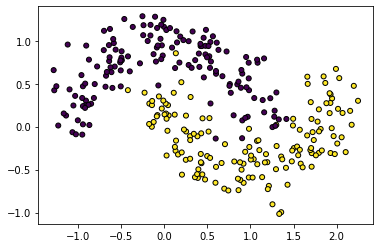

In [3]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X1, Y1 = make_moons(n_samples = 300, noise = 0.2)
plt.scatter(X1[:, 0], X1[:, 1], marker = 'o', c = Y1, s = 25, edgecolor = 'k')

## nn.Sequential

O módulo `nn.Sequential` é um container onde se pode colocar multíplos módulos. Ao reazlizar um `forward` em um objeto `Sequential` ele aplicará sequencialemnte os módulos nele contidas para gerar um saída.

Segue abaixo um exemplo desse módulo contendo 2 camadas `Linear` intercaladas por uma função de ativação `RelU`

In [8]:
import torch
from torch import nn # neural networks

input_size = 2
hidden_size = 8
output_size = 1

net = nn.Sequential(nn.Linear (in_features = input_size, out_features = hidden_size ), # hidden
                    nn.ReLU(),    # ativação não linear
                    nn.Linear(in_features = hidden_size, out_features = output_size))  # output

print(net)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


O módulo `summary` da bibliotecha __torchsummary__ nos permite visualizar mais informações sobre a nossa redem, como a quantidade de parâmetros e o tamanho que cada elemento ocupa na memória.

In [12]:
from torchsummary import summary

summary(net, input_size = (1, input_size))

Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            24
├─ReLU: 1-2                              --
├─Linear: 1-3                            9
Total params: 33
Trainable params: 33
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            24
├─ReLU: 1-2                              --
├─Linear: 1-3                            9
Total params: 33
Trainable params: 33
Non-trainable params: 0

## Forward

In [18]:
tensor = torch.from_numpy(X1).float()
pred = net(tensor)
print(pred.size())

torch.Size([300, 1])
